In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
housing_data = pd.read_csv('datasets/housing.csv')
housing_data = housing_data.dropna()

In [6]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)
housing_data.shape

(19475, 10)

In [8]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [12]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(x_train, y_train)

In [18]:
print('Training score:', linear_model.score(x_train, y_train))
print('Test score:', linear_model.score(x_test, y_test))

Training score: 0.6115421345474298
Test score: 0.6180892297843845


In [20]:
predictors = X.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

ocean_proximity_INLAND        -63039.961909
ocean_proximity_NEAR BAY      -31257.005651
ocean_proximity_<1H OCEAN     -24901.100999
longitude                     -24496.618943
latitude                      -22714.250771
ocean_proximity_NEAR OCEAN    -21881.032134
population                       -31.157421
total_rooms                       -7.704648
households                        55.248805
total_bedrooms                    85.742976
housing_median_age               908.690292
median_income                  38381.072704
ocean_proximity_ISLAND        141079.100693
dtype: float64

In [22]:
y_pred = linear_model.predict(x_test)

df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head()

,predicted,actual
18426,216765.594963,194300.0
16749,232789.977746,238600.0
10631,333499.251153,291300.0
15599,78329.195119,61800.0
10775,273171.197931,261800.0


In [23]:
from sklearn.metrics import r2_score

print('Testing score:', r2_score(y_test, y_pred))

Testing score: 0.6180892297843845


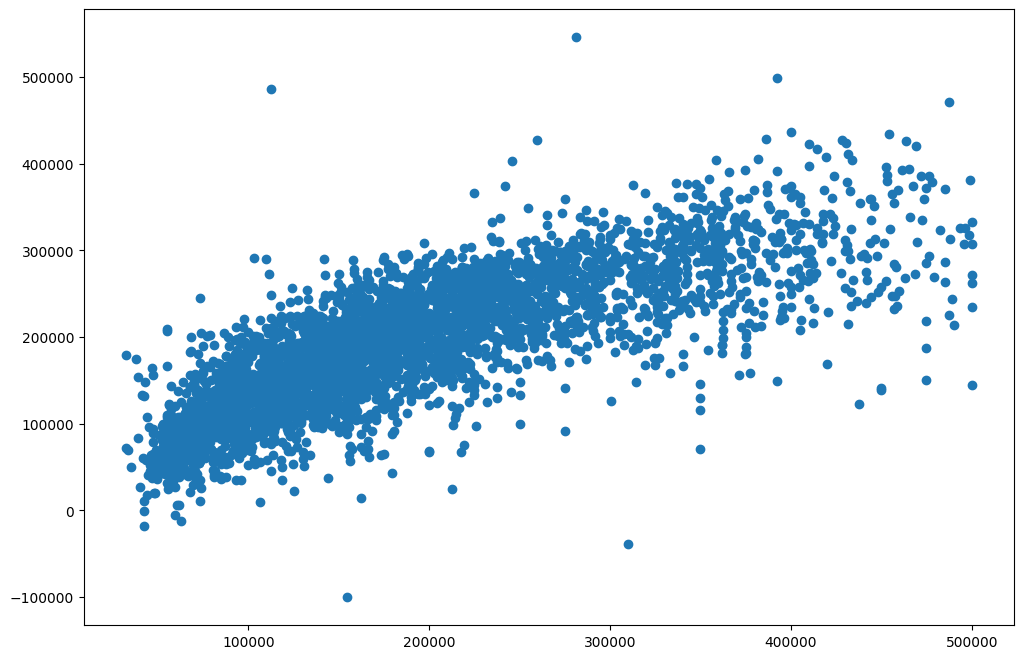

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.show()